In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
rng = np.random

In [9]:
a = tf.constant(10)
b = tf.constant(3)

In [10]:
with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(a * b))

10
30


In [11]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [12]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [13]:
with tf.Session() as sess:
    print(sess.run(mul, feed_dict={a: 40, b: 50}))

2000


In [14]:
matrix1 = tf.constant([[2, 5], [5, 1]])
matrix2 = tf.constant([[1], [-2]])

In [15]:
prod = tf.matmul(matrix1, matrix2)

In [16]:
with tf.Session() as sess:
    result = sess.run(prod)
    print(result)

[[-8]
 [ 3]]


In [17]:


import tensorflow as tf



In [18]:
# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50

In [20]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

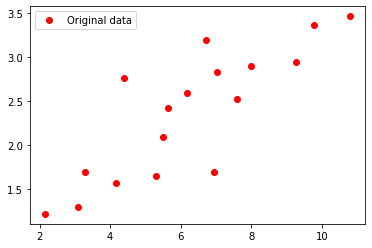

In [21]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [29]:
logs_path = '/tmp/tensorflow_logs/example/'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

In [30]:
with tf.name_scope("Input"):
    X = tf.placeholder('float')
    Y = tf.placeholder('float')

In [31]:
with tf.name_scope("Parameters"):
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")

In [32]:
with tf.name_scope("LinearRegression"):
    pred = tf.add(tf.multiply(X,W), b)

In [33]:
with tf.name_scope("Loss"):
    loss = tf.reduce_sum(tf.pow(pred - Y, 2)/(2*n_samples))
with tf.name_scope("SGD"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [34]:
init = tf.global_variables_initializer()
logs_path = '/tmp/tensorflow_logs/example/'

Epoch: 0050 cost= 0.234031364 W= 0.09558651 b= 1.3457171
Epoch: 0100 cost= 0.097468473 W= 0.16532864 b= 1.3521179
Epoch: 0150 cost= 0.095746644 W= 0.17301163 b= 1.3497789
Epoch: 0200 cost= 0.095501840 W= 0.17423233 b= 1.3465468
Epoch: 0250 cost= 0.095277146 W= 0.17477788 b= 1.3432393
Epoch: 0300 cost= 0.095055573 W= 0.17525016 b= 1.3399432
Epoch: 0350 cost= 0.094836354 W= 0.17571323 b= 1.3366609
Epoch: 0400 cost= 0.094620146 W= 0.17617233 b= 1.3334041
Epoch: 0450 cost= 0.094406769 W= 0.17662814 b= 1.33017
Epoch: 0500 cost= 0.094195627 W= 0.17708108 b= 1.3269504
Epoch: 0550 cost= 0.093986921 W= 0.17753185 b= 1.3237488
Epoch: 0600 cost= 0.093780823 W= 0.17797971 b= 1.3205675
Epoch: 0650 cost= 0.093577698 W= 0.17842472 b= 1.3174136
Epoch: 0700 cost= 0.093377441 W= 0.1788656 b= 1.314285
Epoch: 0750 cost= 0.093178883 W= 0.17930487 b= 1.3111639
Epoch: 0800 cost= 0.092982799 W= 0.17974138 b= 1.308063
Epoch: 0850 cost= 0.092788614 W= 0.18017608 b= 1.304974
Epoch: 0900 cost= 0.092596881 W= 0.18

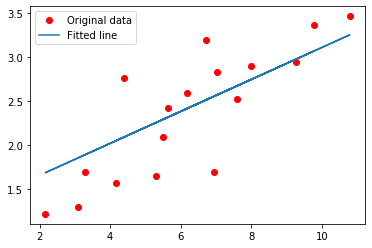

In [35]:
with tf.Session() as sess:
    sess.run(init)
     # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(loss, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    training_cost = sess.run(loss, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [87]:
# Parameters
learning_rate = 0.1
num_steps = 10000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("int32", [None, num_classes])

In [88]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

In [89]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes])),
}

In [90]:
def neural_net(X):
    hidden_layer_1 = tf.add(tf.matmul(X, weights['h1']), biases['b1'])
    hidden_layer_2 = tf.add(tf.matmul(hidden_layer_1, weights['h2']), biases['b2'])
    output = tf.add(tf.matmul(hidden_layer_2, weights['out']), biases['out'])
    return output

In [91]:
logits_net = neural_net(X)

In [92]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits_net, labels=Y))

In [93]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

In [94]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True,
                source_url='http://yann.lecun.com/exdb/fashion_mnist/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [95]:
# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits_net, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [96]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
#         print(batch_y.shape, batch_x.shape)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))



Step 1, Minibatch Loss= 8948.6719, Training Accuracy= 0.461


TypeError: Fetch argument 8948.672 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)